---
jupyter: python3
title: 'Part 1: Pixel Processing'
---

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math
import os

def display(image, title="figure"):
    """
    deals with opencv being in BGR and matplotlib being in RGB
    """
    plt.figure()
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

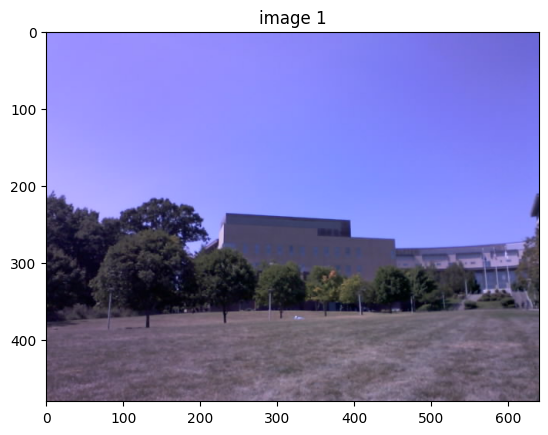

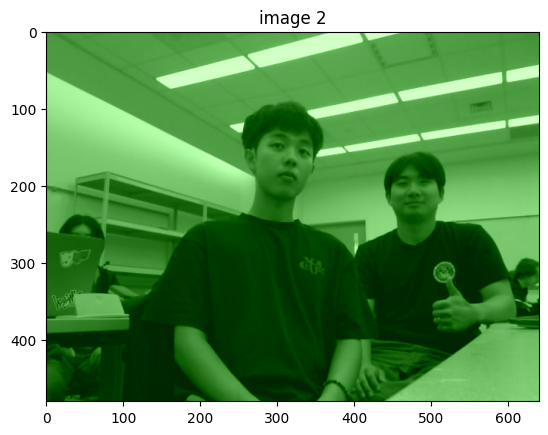

In [2]:
# Load Image
img1 = cv.imread("../img0.jpg")
img2 = cv.imread("../img1.jpg")

display(img1, "image 1")
display(img2, "image 2")

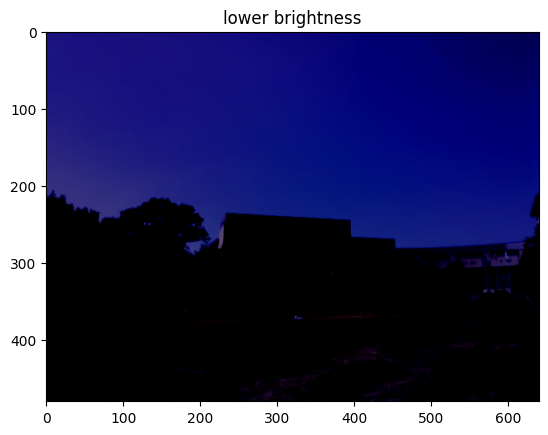

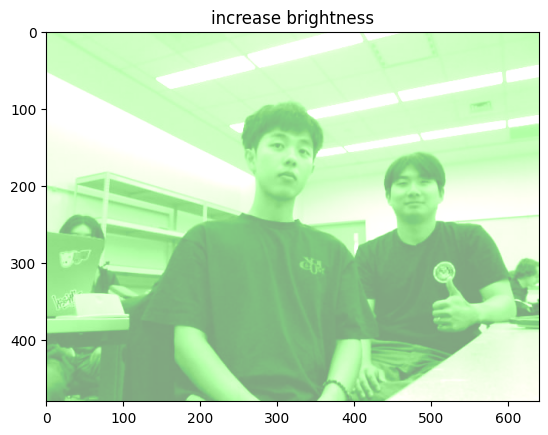

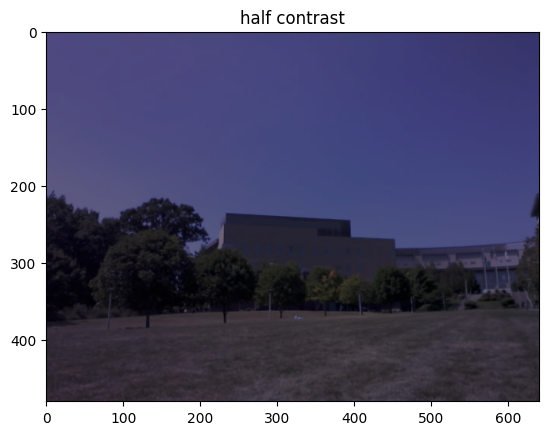

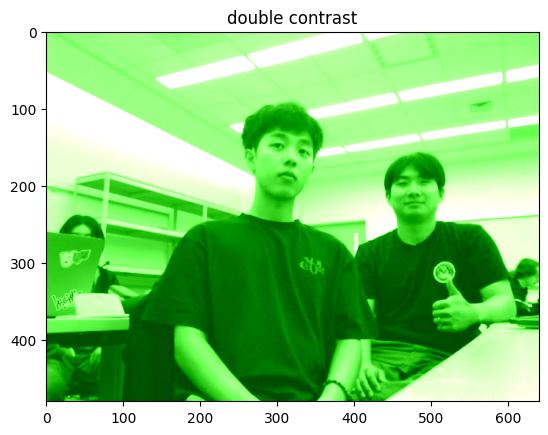

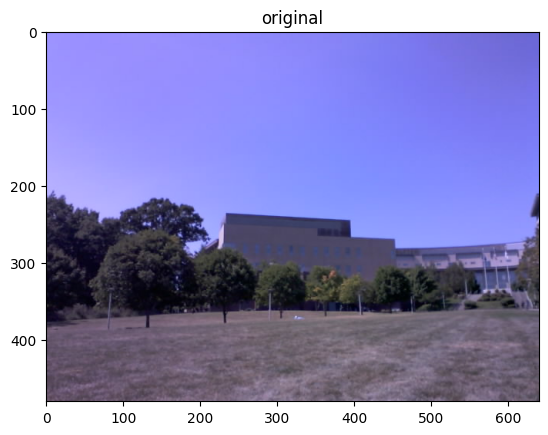

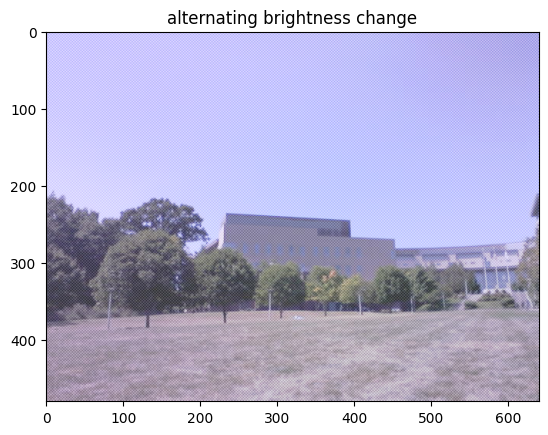

In [3]:
# a) change brightness

img1_bright = cv.add(img1, -128) # type: ignore

img2_bright = cv.add(img2, 128) # type: ignore

display(img1_bright, "lower brightness")
display(img2_bright, "increase brightness")

# b) change contrast

img1_contrast = cv.divide(img1, 2) # type: ignore

img2_contrast = cv.divide(img2, 0.5) # type: ignore

display(img1_contrast, "half contrast")
display(img2_contrast, "double contrast")

# c) change brightness of alternating pixels
b = np.array([[128, 0], [0, 128]])
img1_alt = np.tile(b, (np.shape(img1)[0]//2,np.shape(img1)[1]//2))

matrix = cv.merge([img1_alt, img1_alt, img1_alt])
matrix = matrix.astype(img1.dtype)

display(img1, "original")
display(cv.add(img1,matrix), "alternating brightness change")

### Part 2: Color Spaces

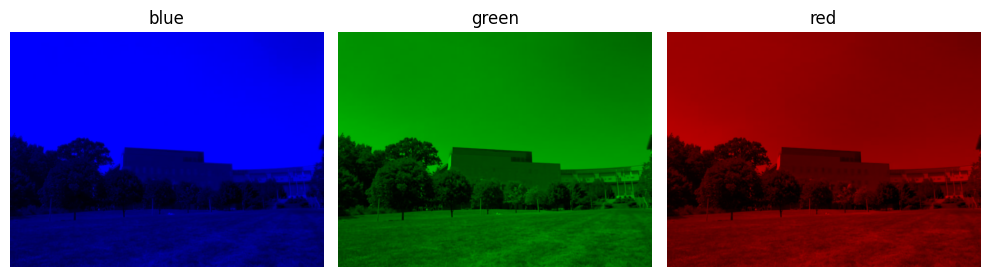

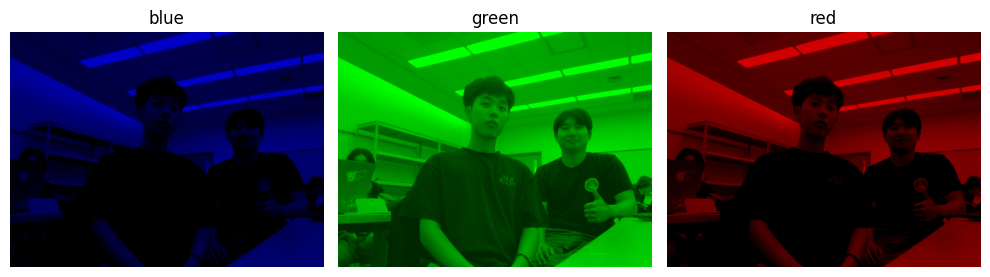

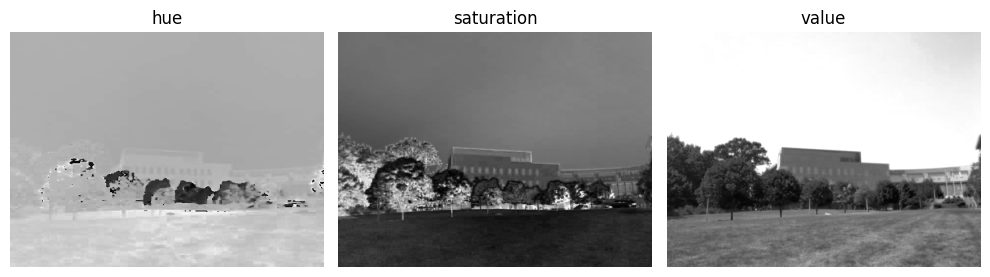

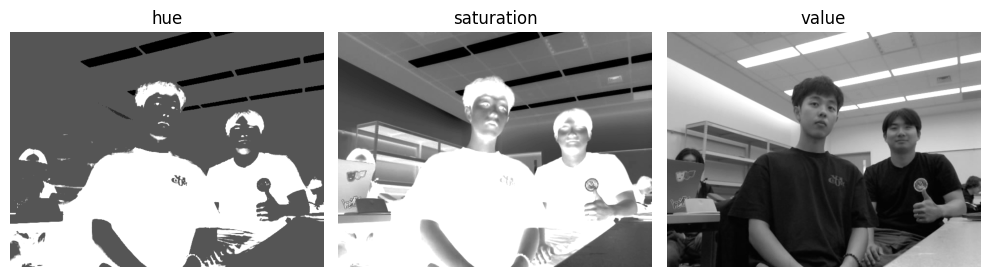

In [4]:
# a) show images in different color spaces (RGB and HSV)
b1,g1,r1 = img1[:,:,0], img1[:,:,1], img1[:,:,2]
b2,g2,r2 = img2[:,:,0], img2[:,:,1], img2[:,:,2]
zeros = np.zeros((img1.shape[0], img1.shape[1])).astype('uint8')

channels_bgr_1 = [cv.merge([b1,zeros,zeros]), cv.merge([zeros,g1,zeros]), cv.merge([zeros,zeros,r1])]
channels_bgr_2 = [cv.merge([b2,zeros,zeros]), cv.merge([zeros,g2,zeros]), cv.merge([zeros,zeros,r2])]
titles_bgr = ['blue', 'green', 'red']

img1_hsv = cv.cvtColor(img1, cv.COLOR_BGR2HSV)
img2_hsv = cv.cvtColor(img2, cv.COLOR_BGR2HSV)
channels_hsv_1 = [img1_hsv[:,:,0], img1_hsv[:,:,1], img1_hsv[:,:,2]]
channels_hsv_2 = [img2_hsv[:,:,0], img2_hsv[:,:,1], img2_hsv[:,:,2]]
titles_hsv = ['hue', 'saturation', 'value']

    
# Show RGB for both images

plt.figure(figsize=(10, 7))
i = 1
for channel, title in zip(channels_bgr_1,titles_bgr):
    # Display hue
    plt.subplot(1, 3, i)
    plt.imshow(cv.cvtColor(channel, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    i += 1
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 7))
i = 1
for channel, title in zip(channels_bgr_2,titles_bgr):
    # Display hue
    plt.subplot(1, 3, i)
    plt.imshow(cv.cvtColor(channel, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    i += 1
plt.tight_layout()
plt.show()


# Show HSV for both images

plt.figure(figsize=(10, 7))
i = 1
for channel, title in zip(channels_hsv_1,titles_hsv):
    plt.subplot(1, 3, i)
    plt.imshow(channel, cmap='gray')
    plt.title(title)
    plt.axis('off')
    i += 1
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 7))
i = 1
for channel, title in zip(channels_hsv_2,titles_hsv):
    plt.subplot(1, 3, i)
    plt.imshow(channel, cmap='gray')
    plt.title(title)
    plt.axis('off')
    i += 1
plt.tight_layout()
plt.show()

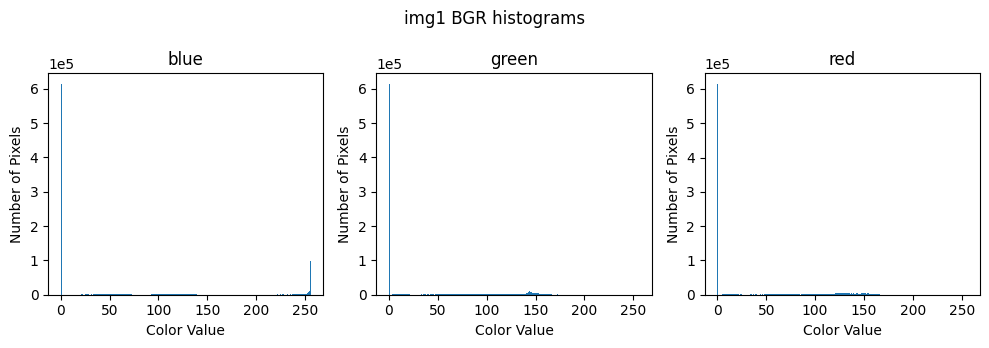

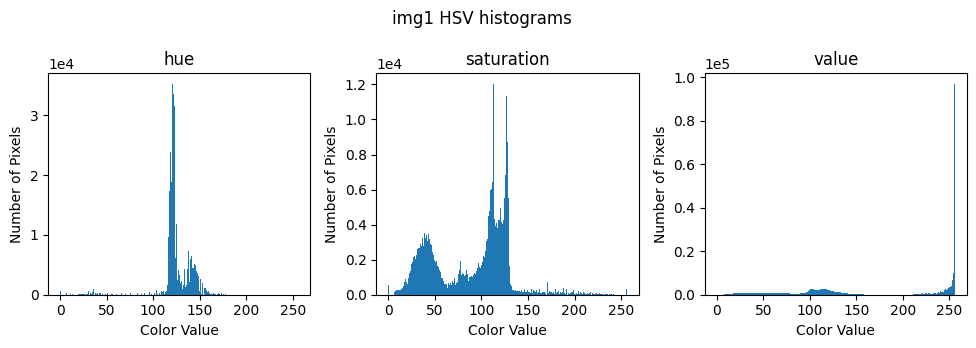

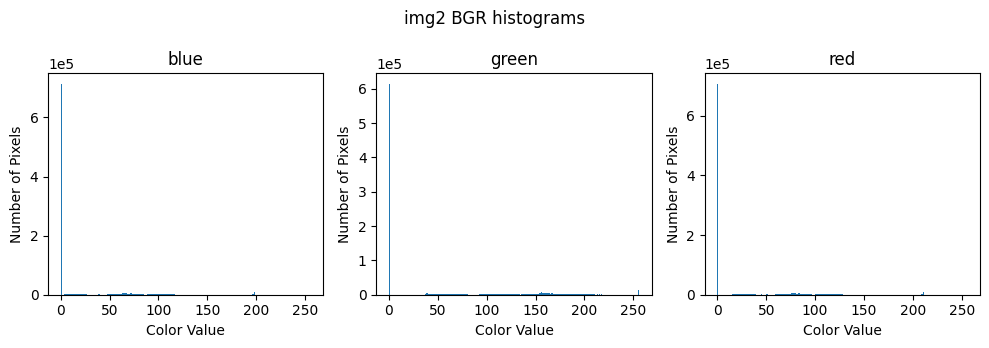

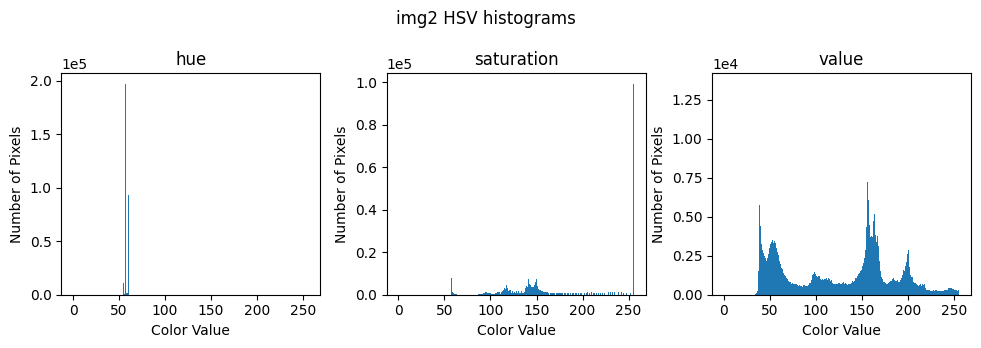

In [5]:
# b) Plot at least 4 different histograms for each image from the various color spaces
channel_list = [channels_bgr_1, channels_hsv_1, channels_bgr_2, channels_hsv_2]

def return_titles(i,j):
    if (i / 2) == (i // 2):
        return (titles_bgr[j], f"img{i//2 + 1} BGR histograms")
    return (titles_hsv[j], f"img{i//2 + 1} HSV histograms")

for i, channel in enumerate(channel_list):
    plt.figure(figsize=(10,3.5))
    for j,img in enumerate(channel):
        title, suptitle = return_titles(i,j)
        plt.suptitle(suptitle)
        plt.subplot(1, 3, j+1)
        plt.hist(img.ravel(),256,[0,256])
        plt.title(title)
        plt.ticklabel_format(style='sci', axis="y", scilimits=(0, 0)) 
        plt.xlabel("Color Value")
        plt.ylabel("Number of Pixels")
    plt.tight_layout()
    plt.show()

#### Were these color spaces useful for your chosen image? Did they show something that you would not see in a color or grayscale image? Did the histograms show something useful?

The green color space for the RGB color filters was most useful for our image of people, likely because it appears brighter and also because skin tones do not typically contain much green. Furthermore, the original image was taken with a green filter. However, our results for the HSV color space were more interesting. The image of Olin's campus in the saturation color space made the distinction between the top of the tree line and Milas Hall much clearer, even more so than in the original color image or in the grayscale. This could be useful for categorization of different features in an image. This is also evident in the corresponding histogram (img1 is Olin's campus, while img2 is an image of people), as you can see that there are many distinct peaks, corresponding to different features. 

Another interesting result from our color space exploration was of Dokyun's shirt logo and the laptop sticker in the background. The hue color space for img2 was very good at picking out the logo, as it was a different color than the shirt, while the laptop sticker was best seen in the saturation image because it shared a similar hue to the laptop but dissimilar saturation. Both of these distinctions were highlighted by their corresponding color spaces and were more obvious than in the original green filtered image. However, it was difficult to see this result from the histogram, possibly because the shades in both the logo and sticker were present elsewhere in the image.



### Part 3: Convolution/linear filtering

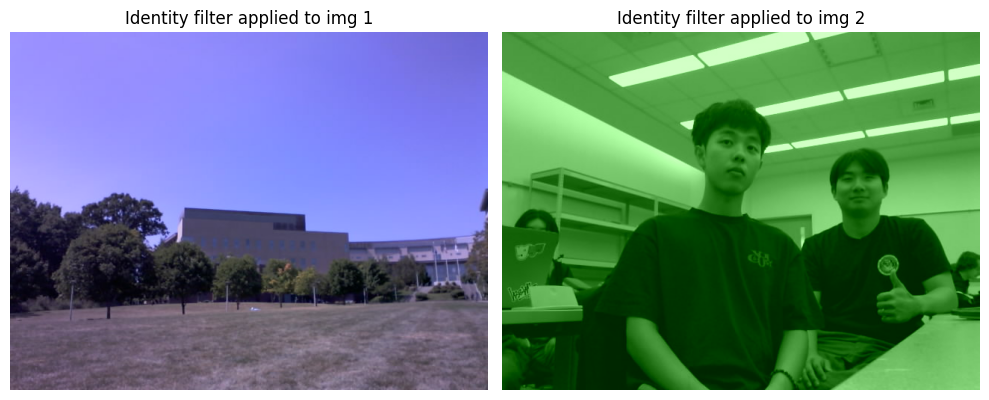

In [6]:
# a) Apply identity filter to both images

iden_filter = np.array([[0,0,0],[0,1,0],[0,0,0]])

img1_iden = cv.filter2D(img1, -1, iden_filter)
img2_iden = cv.filter2D(img2, -1, iden_filter)

plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img1_iden, cv.COLOR_BGR2RGB))
plt.title("Identity filter applied to img 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img2_iden, cv.COLOR_BGR2RGB))
plt.title("Identity filter applied to img 2")
plt.axis('off')

plt.tight_layout()
plt.show()

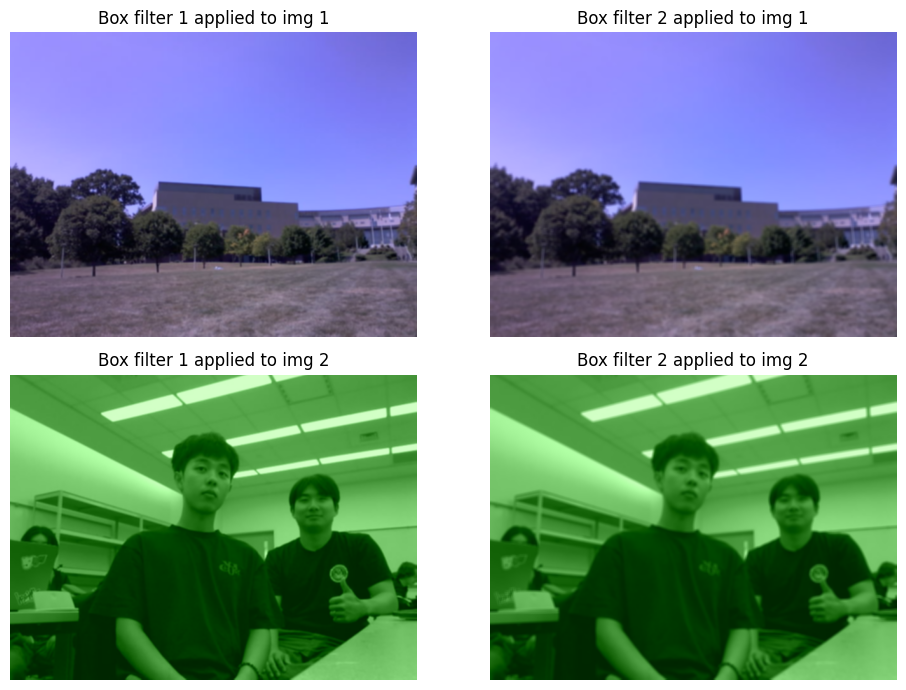

In [7]:
# b) Apply box filter of 2 different sizes to both images (total 4 images)

box_filter1 = np.ones((3,3), dtype='uint8') / 9
box_filter2 = np.ones((5,5), dtype='uint8') / 25

img1_box1 = cv.filter2D(img1, -1, box_filter1)
img1_box2 = cv.filter2D(img1, -1, box_filter2)
img2_box1 = cv.filter2D(img2, -1, box_filter1)
img2_box2 = cv.filter2D(img2, -1, box_filter2)

plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img1_box1, cv.COLOR_BGR2RGB))
plt.title("Box filter 1 applied to img 1")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(img1_box2, cv.COLOR_BGR2RGB))
plt.title("Box filter 2 applied to img 1")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(img2_box1, cv.COLOR_BGR2RGB))
plt.title("Box filter 1 applied to img 2")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(img2_box2, cv.COLOR_BGR2RGB))
plt.title("Box filter 2 applied to img 2")
plt.axis('off')

plt.tight_layout()
plt.show()

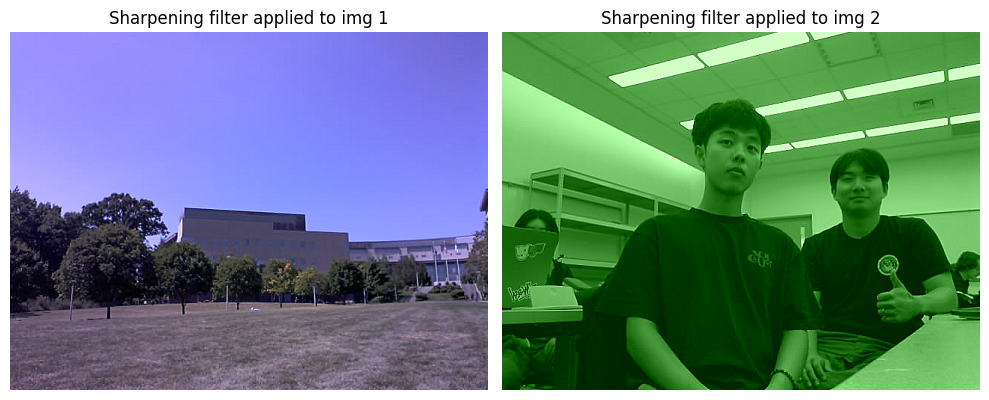

In [8]:
# c) Think about what a sharpening filter would look like and apply it to your 2 images

sharp_filter = np.array([
                        [0,-1,0],
                        [-1,5,-1],
                        [0,-1,0]
                        ])
    
img1_sharp = cv.filter2D(img1, -1, sharp_filter)
img2_sharp = cv.filter2D(img2, -1, sharp_filter)

plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img1_sharp, cv.COLOR_BGR2RGB))
plt.title("Sharpening filter applied to img 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img2_sharp, cv.COLOR_BGR2RGB))
plt.title("Sharpening filter applied to img 2")
plt.axis('off')

plt.tight_layout()
plt.show()

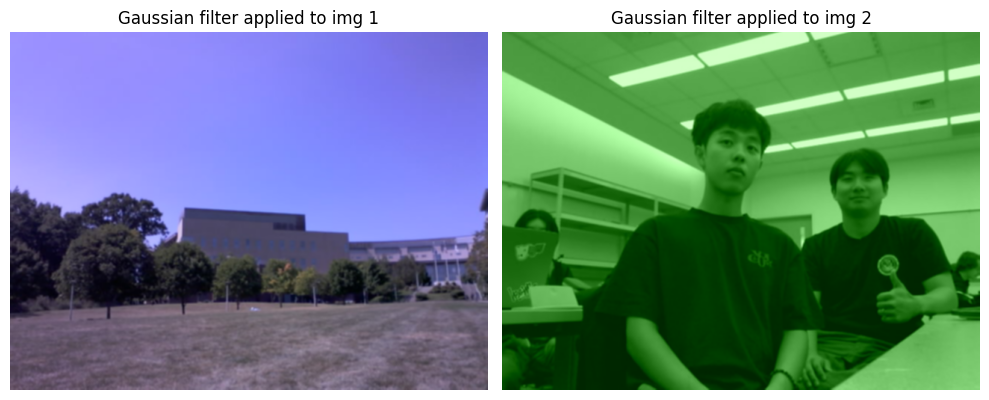

In [9]:
# d) Design a 3 x 3 Gaussian filter and apply it to your 2 images

def calc_gaussian(i,j,var):
    frac = (1/(2*math.pi*var))
    expo = math.exp(-0.5*((i**2 + j**2)/ var))

    return (frac * expo)

var = 4
size = 3
center = size // 2
gaus_filter = np.array([[calc_gaussian(i - center, j - center, var) 
                            for j in range(size)] 
                            for i in range(size)])

# Normalize
gaus_filter /= np.sum(gaus_filter)

img1_gauss = cv.filter2D(img1, -1, gaus_filter)
img2_gauss = cv.filter2D(img2, -1, gaus_filter)

plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img1_gauss, cv.COLOR_BGR2RGB))
plt.title("Gaussian filter applied to img 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img2_gauss, cv.COLOR_BGR2RGB))
plt.title("Gaussian filter applied to img 2")
plt.axis('off')

plt.tight_layout()
plt.show()